The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

### medv
median value of owner-occupied homes in \$1000s.

### crim
per capita crime rate by town.

### zn
proportion of residential land zoned for lots over 25,000 sq.ft.

### indus
proportion of non-retail business acres per town.

### chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

### nox
nitrogen oxides concentration (parts per 10 million).

### rm
average number of rooms per dwelling.

### age
proportion of owner-occupied units built prior to 1940.

### dis
weighted mean of distances to five Boston employment centres.

### rad
index of accessibility to radial highways.

### tax
full-value property-tax rate per \$10,000.

### ptratio
pupil-teacher ratio by town.

### black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

### lstat
lower status of the population (percent).



# Assumptions of model
- Relationship between IVs and DV is Linear
- Regression residuals must be normally distributed.
- No Autocorrelation of the residuals.
- The residuals are homoscedastic and approximately rectangular-shaped.
- No Multicolinearity

# Imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Setting up dataframe

In [2]:
housing_df = pd.read_csv(r"Boston.csv")

In [3]:
housing_df.head(11)

,medv,crime rate,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,28.7,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,22.9,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,27.1,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,16.5,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,18.9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [4]:
housing_df.describe()

,medv,crime rate,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
# Here I Here I separate the Independant variables form the dependant variables and assign them to 
# their own dataframes 

# I also removed rad

ALLIVs = housing_df.drop(["medv"], axis=1)
DV = housing_df[["medv"]]

# Testing for correlations between IVs/DV and Multicolinearity

,crime rate,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crime rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


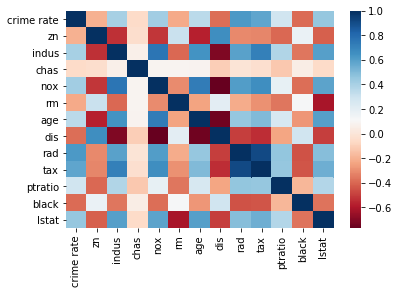

In [6]:
# I output a corralation heatmap. 

corr = ALLIVs.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [7]:
# Here I print out the VIF
#VIF indicates the degree of multicolliearity in the featureset
# Where the VIF is above 5, it indicates that you may need to remove either:
# that feature from the dataset
# or
# Another feature that is causing the multicolinearity

IVsWithConstant = sm.tools.add_constant(ALLIVs)
series = pd.Series([variance_inflation_factor(IVsWithConstant.values, i) for i in range(IVsWithConstant.shape[1])], index=IVsWithConstant.columns)
series

const         585.265238
crime rate      1.792192
zn              2.298758
indus           3.991596
chas            1.073995
nox             4.393720
rm              1.933744
age             3.100826
dis             3.955945
rad             7.484496
tax             9.008554
ptratio         1.799084
black           1.348521
lstat           2.941491
dtype: float64

In [8]:
# I removed rad from the dataset in order to accomodate for the multicollinearity between the 
# rad and tax  features 

ALLIVs = ALLIVs.drop(["rad"], axis=1)
IVsWithConstant = sm.tools.add_constant(ALLIVs)
series = pd.Series([variance_inflation_factor(IVsWithConstant.values, i) for i in range(IVsWithConstant.shape[1])], index=IVsWithConstant.columns)
series

const         537.858634
crime rate      1.664471
zn              2.273018
indus           3.682265
chas            1.061561
nox             4.304929
rm              1.885425
age             3.083009
dis             3.954951
tax             3.415289
ptratio         1.734873
black           1.341459
lstat           2.937752
dtype: float64

# ATTENTION

In [9]:
ALLIVs

,crime rate,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48


In [10]:
ALLIVs[['crime rate', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'black', 'lstat']] = StandardScaler().fit_transform(ALLIVs[['crime rate', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'black', 'lstat']])


In [11]:
ALLIVs

,crime rate,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0,0.158124,0.439316,0.018673,-0.625796,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,0,0.158124,-0.234548,0.288933,-0.716639,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,0,0.158124,0.984960,0.797449,-0.773684,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,0,0.158124,0.725672,0.736996,-0.668437,-0.803212,1.176466,0.403225,-0.865302


# creating the model

In [12]:
# splitting the data between test and train groups

X_train, X_test, y_train, y_test = train_test_split(ALLIVs, DV, test_size=0.20, random_state=1)

In [13]:
# creating the model

model = linear_model.LinearRegression()
model.fit(ALLIVs, DV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model.intercept_


array([22.31738525])

In [14]:
# outputting the coefficients in order to see what features among the model impact the most

model.coef_

array([[-0.5803763 ,  0.92544615, -0.40032078,  3.11437328, -1.76675328,
         2.88813724, -0.11042449, -3.13472891,  0.22463344, -1.81402169,
         0.76749195, -3.68412661]])

In [45]:
ALLIVs.columns

Index(['crime rate', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

We can see by looking at the coeficients in the model that:


chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

rm - rooms

dis - weighted mean of distances to five Boston employment centres.

lstat - lower status of the population

Have the most substaintial impact on predicting medv which both makes sense contextually, and we know these results are trustworthy becuase we have normalised the data 

In [17]:
 X_test

,crime rate,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat
307,-0.414778,0.928623,-1.306878,0,-0.714347,0.804028,0.061346,-0.291089,-1.106115,-0.025677,0.441052,-0.718119
343,-0.417558,1.872854,-1.073423,0,-0.610687,0.586056,-0.432946,0.920817,-0.227101,-0.395567,0.441052,-0.767180
47,-0.393837,-0.487722,-0.616727,0,-0.921667,-0.362767,0.601866,0.900519,-1.040783,-0.256858,0.395440,0.861639
67,-0.413781,0.048772,-0.739290,0,-1.258562,-0.579315,-1.677566,1.284902,-0.375583,0.205505,0.433487,-0.638220
362,0.007529,-0.487722,1.015999,0,1.859875,-1.314439,0.982364,-0.804060,1.530926,0.806576,0.264416,-0.345257
...,...,...,...,...,...,...,...,...,...,...,...,...
92,-0.415626,0.714026,0.569516,0,-0.783454,0.224192,-0.532516,-0.061390,-0.821030,-0.118149,0.420329,-0.629810
224,-0.383821,-0.487722,-0.720322,0,-0.437921,2.822770,0.345830,-0.428138,-0.601276,-0.488039,0.311124,-1.193308
110,-0.407957,-0.487722,-0.375976,0,-0.299707,-0.127698,-0.504068,-0.483566,-0.143951,1.130230,0.403663,0.048631
426,1.004729,-0.487722,1.015999,0,0.253146,-0.637726,-0.315597,-0.854449,1.530926,0.806576,-3.640430,0.425699


In [16]:
y_predict = model.predict(X_test)

# Evaluation

In [19]:
y_test_array = np.array(y_test)

In [20]:
# Here I create my own function to determine the accuracy of the model


def AccuracyEvaluation():
    
    withinFive = 0
    for i in range(len(y_predict)):
        if (y_predict[i] > y_test_array[i] * 0.95) and (y_predict[i] < y_test_array[i] * 1.05):
            withinFive += 1
    
    withinTen = 0
    for i in range(len(y_predict)):
        if (y_predict[i] > y_test_array[i] * 0.9) and (y_predict[i] < y_test_array[i] * 1.1):
            withinTen += 1
            
    withinTwenty = 0    
    for i in range(len(y_predict)):
        if (y_predict[i] > y_test_array[i] * 0.8) and (y_predict[i] < y_test_array[i] * 1.2):
            withinTwenty += 1
            
    withinThirty = 0
    for i in range(len(y_predict)):
        if (y_predict[i] > y_test_array[i] * 0.7) and (y_predict[i] < y_test_array[i] * 1.3):
            withinThirty += 1
            
    print("We will now count the number of predictions within a certain range of the actual value.") 
    print("{:.4}% of the predictions are are within 5% of the actual value".format( 100 * (withinFive / len(y_test_array)) ))
    print("{:.4}% of the predictions are are within 10% of the actual value".format( 100 * (withinTen / len(y_test_array)) ))
    print("{:.4}% of the predictions are are within 20% of the actual value".format( 100 * (withinTwenty / len(y_test_array)) ))
    print("{:.4}% of the predictions are are within 30% of the actual value".format( 100 * (withinThirty / len(y_test_array)) ))


In [21]:
# Im pretty happy with the results found in this function

AccuracyEvaluation()



We will now count the number of predictions within a certain range of the actual value.
20.59% of the predictions are are within 5% of the actual value
36.27% of the predictions are are within 10% of the actual value
64.71% of the predictions are are within 20% of the actual value
81.37% of the predictions are are within 30% of the actual value


In [ ]:
# The MAE gives us the average distance between the predicted value and the actual value

mean_absolute_error(y_test_array, y_predict)

In [38]:
#MSE is like the MAE, expect we square the erros. This more heavily punishes outliers, and takes 
# into account the residuals of a -ve value, but unfortunately since it is squared, you cant
# compare this value to the actual data in context. its out of scale

mean_squared_error(y_test_array, y_predict)

22.17852890850556

In [40]:
# RMSE (also know as standard deviation) is the squareroot of the MSE. This is useful because it
# takes into account -ve errors, and is in the same units as the original data 

np.sqrt(mean_squared_error(y_test_array, y_predict))

4.709408551878416

In [23]:
# r^2 is a correlation measure. A correlation of 0.78 shows that there is a strong correlation 
# between the value i predict, and the actual value.

r2_score(y_test_array, y_predict)

0.7755831755909357

(Possible improvement would be to check for heteroskedasticity)

